<a href="https://colab.research.google.com/github/anuragpan/ltf-income-challenge/blob/main/LTF_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls drive/MyDrive/DataScience/LTF_pearl_challenge/Pearl\ Challenge\ data\ with\ dictionary_For_Share_v4.xlsx

ls: cannot access 'drive/MyDrive/DataScience/LTF_pearl_challenge/Pearl Challenge data with dictionary_For_Share_v4.xlsx': No such file or directory


In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_excel('drive/MyDrive/DataScience/LTF_pearl_challenge/Pearl Challenge data with dictionary_For_Share_v4.xlsx', sheet_name='TrainData')
df = df.rename(columns={'Target_Variable/Total Income':'Targetvar'})

In [5]:
print(df.shape)
df = df.drop_duplicates(['FarmerID'])
print(df.shape)

(53306, 105)
(53279, 105)


<Axes: xlabel='State'>

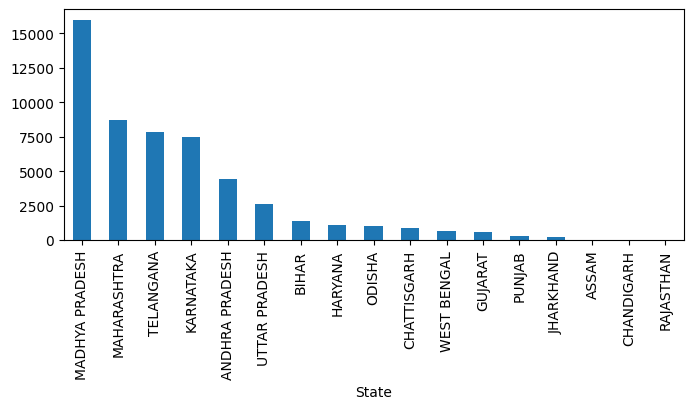

In [6]:
df['State'].value_counts().plot(kind='bar', figsize=(8,3))

In [7]:
df['Targetvar'].describe(percentiles=[0.0001,0.001,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99, 0.995, 0.999, ])

,Targetvar
count,5.327900e+04
mean,1.376178e+06
std,2.647858e+07
min,0.000000e+00
0.01%,9.295624e+03
0.1%,2.625128e+05
1%,4.256240e+05
5%,5.200000e+05
10%,6.000000e+05
25%,7.150000e+05


In [8]:
df['Targetvar'].isnull().sum()

np.int64(0)

## Checking for Outlier in Target

In [9]:
df2 = df[(df['Targetvar'] > 9.4e3) & (df['Targetvar'] < 9.3e6)]

<Axes: >

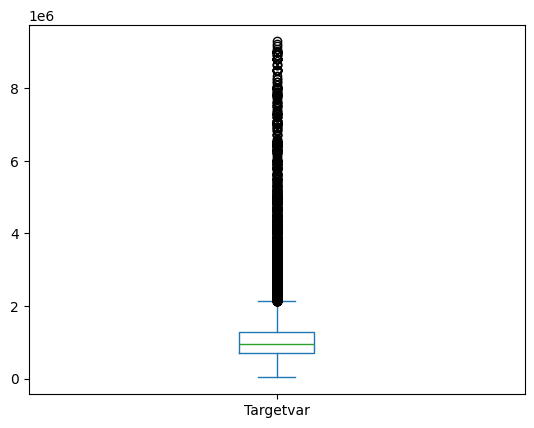

In [10]:
df2['Targetvar'].plot(kind='box')

<Axes: >

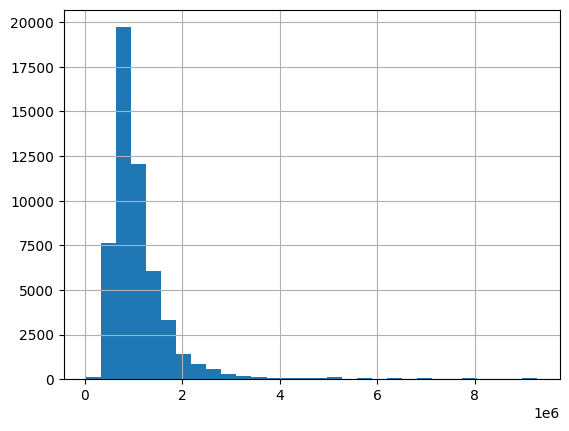

In [11]:
df2['Targetvar'].hist(bins=30)

<Axes: >

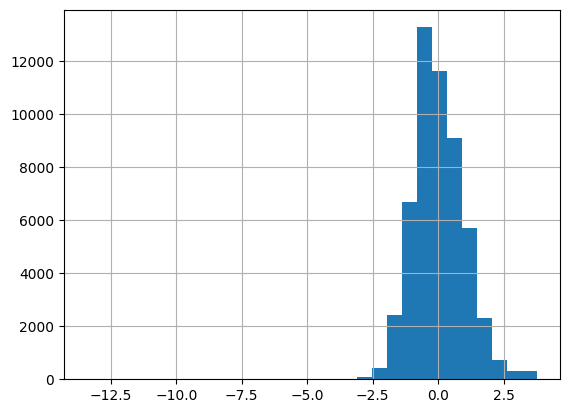

In [21]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method= 'box-cox')
df2['Targetvar2'] = pt.fit_transform(df2[['Targetvar']])

df2['Targetvar2'].hist(bins=30)

In [25]:
df2.columns[:26]

Index(['FarmerID', 'State', 'REGION', 'SEX', 'CITY', 'Zipcode', 'DISTRICT',
       'VILLAGE', 'MARITAL_STATUS', 'Location', 'Address type', 'Ownership',
       'No_of_Active_Loan_In_Bureau', 'Avg_Disbursement_Amount_Bureau',
       'Non_Agriculture_Income', 'Total_Land_For_Agriculture',
       'K022-Village category based on Agri parameters (Good, Average, Poor)',
       'K022-Nearest Mandi Name', 'K022-Proximity to nearest mandi (Km)',
       'K022-Proximity to nearest railway (Km)',
       'KO22-Village score based on socio-economic parameters (0 to 100)',
       'K022-Village category based on socio-economic parameters (Good, Average, Poor)',
       'K022-Seasonal Average Rainfall (mm)',
       'K022-Ambient temperature (min & max)',
       'R022-Village category based on Agri parameters (Good, Average, Poor)',
       'R022-Seasonal Average Rainfall (mm)'],
      dtype='object')

In [43]:
df3 = df2.drop(['Targetvar','CITY', 'Zipcode', 'DISTRICT',
       'VILLAGE', 'Location','Address type', 'Ownership'], axis=1)

# df3.columns

In [42]:
#check missing Values

df3.isnull().sum().loc[lambda x:x>0]

,0
Avg_Disbursement_Amount_Bureau,22906
Total_Land_For_Agriculture,78
Perc_of_house_with_6plus_room,185
Women_15_19_Mothers_or_Pregnant_at_time_of_survey,185
perc_of_pop_living_in_hh_electricity,185
perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms,185
mat_roof_Metal_GI_Asbestos_sheets,185
perc_of_Wall_material_with_Burnt_brick,185
Households_with_improved_Sanitation_Facility,185
perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k,185


In [45]:
df3['Avg_Disbursement_Amount_Bureau'] = df3['Avg_Disbursement_Amount_Bureau'].fillna(0)

In [49]:
#check missing Values
df3 = df3.dropna()

df3.shape

(52742, 98)

In [52]:
#check missing Values

df3.isnull().sum().loc[lambda x:x>0]

,0


In [53]:
df3.head(1)

,FarmerID,State,REGION,SEX,MARITAL_STATUS,No_of_Active_Loan_In_Bureau,Avg_Disbursement_Amount_Bureau,Non_Agriculture_Income,Total_Land_For_Agriculture,"K022-Village category based on Agri parameters (Good, Average, Poor)",...,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Targetvar2
268,9676343297661730,MADHYA PRADESH,CENTRAL,M,M,0,0.0,502500,10.0,Poor,...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,86.04,26.14,0.96,11.56283,15.995973,Poor,0.144622,18.13,3.773251
